Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf  # Import TensorFlow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## Mount google drive to load the data
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


This assignment uses a dataset of about 2239 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Check the access to the folders:
!ls "/content/drive/My Drive/dataset/"


Test  Train


In [ ]:
import pathlib

# Defining the paths for the train and test datasets
data_dir_train = pathlib.Path("/content/drive/My Drive/dataset/Train/")
data_dir_test  = pathlib.Path("/content/drive/My Drive/dataset/Test/")


In [ ]:
# Check the files count in Train/Test data set
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Visualize distribution of classes in the training dataset[link text](https://)

In [ ]:
def class_distribution_count(directory):

    #count number of image in each classes
    count= []  # Initialize the list
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    # name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class Name', 'No. of Images'])

df = class_distribution_count(data_dir_train)
df

,Class Name,No. of Images
0,actinic keratosis,114
1,melanoma,438
2,seborrheic keratosis,77
3,basal cell carcinoma,376
4,nevus,357
5,squamous cell carcinoma,181
6,dermatofibroma,95
7,pigmented benign keratosis,462
8,vascular lesion,139


In [ ]:
print("Total No of Images : ", df['No. of Images'].sum())

Total No of Images :  2239


<ipython-input-15-2d2156a61716>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="No. of Images", y="Class Name", data=df, label="Class Name" , palette=custom_colors)
<ipython-input-15-2d2156a61716>:6: UserWarning: 
The palette list has fewer values (5) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="No. of Images", y="Class Name", data=df, label="Class Name" , palette=custom_colors)


<Axes: xlabel='No. of Images', ylabel='Class Name'>

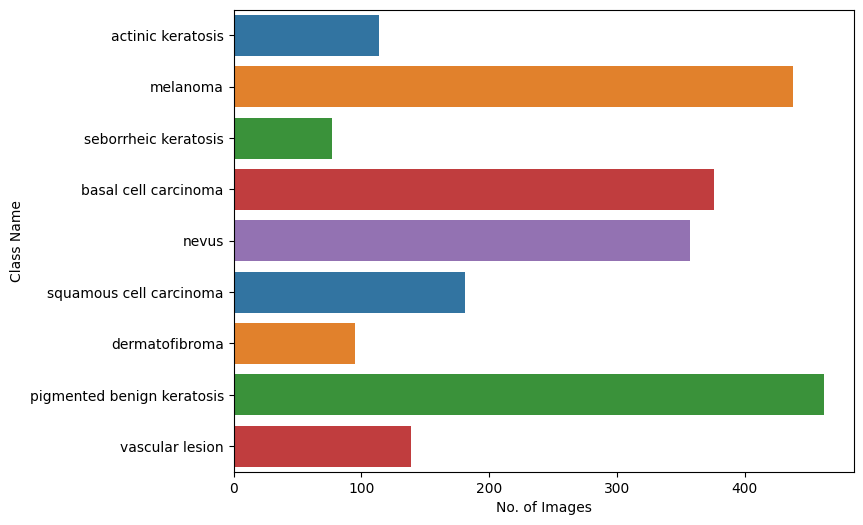

In [ ]:
# Visualize the Number of images in each class.
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x="No. of Images", y="Class Name", data=df, label="Class Name" , palette=custom_colors)

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

Use 80% of the images for training, and 20% for validation.

In [ ]:
batch_size = 32
img_height = 180
img_width = 180
validation_split = 0.2  # 20% for validation
seed = 123

In [ ]:
# Load the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,  # Directory containing training images
    seed=seed,                              # Use seed for reproducibility
    image_size=(img_height, img_width),     # Resize images
    batch_size=batch_size,                  # Set batch size
    label_mode='int',                       # Labels as integers
    validation_split=validation_split,      # Split ratio
    subset='training'                       # Load the training subset
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [ ]:
# Load the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,  # Directory containing training images
    seed=seed,                              # Use seed for reproducibility
    image_size=(img_height, img_width),     # Resize images
    batch_size=batch_size,                  # Set batch size
    label_mode='int',                       # Labels as integers
    validation_split=validation_split,      # Split ratio
    subset='validation'                     # Load the validation subset
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [32]:
# Verify the datasets by printing the shape of the first batch from each
for images, labels in train_ds.take(1):
    print(f"Training image batch shape: {images.shape}")
    print(f"Training label batch shape: {labels.shape}")

for images, labels in val_ds.take(1):
    print(f"Validation image batch shape: {images.shape}")
    print(f"Validation label batch shape: {labels.shape}")

Training image batch shape: (32, 180, 180, 3)
Training label batch shape: (32,)
Validation image batch shape: (32, 180, 180, 3)
Validation label batch shape: (32,)


In [33]:
# List out all the classes of skin cancer and store them in a class_names list.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

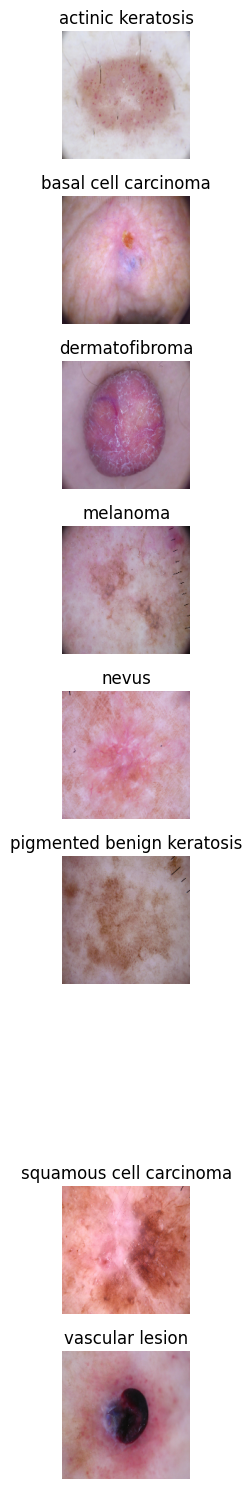

In [ ]:
# import matplotlib.pyplot as plt
# import tensorflow as tf

# Function to plot images and their labels
def plot_class_examples(dataset, class_names, num_classes=9):
    plt.figure(figsize=(15, 15))

    # Iterate over each class
    for i, class_name in enumerate(class_names[:num_classes]):
        # Get one example image and label
        for image, label in dataset:
            if class_names[label[0].numpy()] == class_name:
                plt.subplot(num_classes, 1, i + 1)
                plt.imshow(image[0].numpy().astype("uint8"))
                plt.title(class_name)
                plt.axis('off')
                break

    plt.tight_layout()
    plt.show()

# Visualize one instance of each class from the training dataset
plot_class_examples(train_ds, class_names)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the normalization layer
normalization_layer = layers.Rescaling(1./255)

# Define the normalization layer
#normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

# Apply normalization to training and validation data
#X_train_normalized = normalization_layer(train_ds)
#X_val_normalized = normalization_layer(val_ds)

# Define the CNN Model
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        # Input Layer
        layers.InputLayer(input_shape=input_shape),
        layers.Rescaling(1./255, input_shape=input_shape),

        # Convolutional Layer 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Convolutional Layer 2
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Convolutional Layer 3
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Flatten the output
        layers.Flatten(),

        # Dense Layer
        layers.Dense(128, activation='relu'),

        # Output Layer
        layers.Dense(num_classes, activation='softmax')
    ])

    return model


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
# Define input shape and number of classes
input_shape = (img_height, img_width, 3)
num_classes = 9

# Create the model
model = create_cnn_model(input_shape, num_classes)

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' for integer labels
    metrics=['accuracy']
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,929,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,024,393 (30.61 MB)

 Trainable params: 8,024,393 (30.61 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [ ]:
# Now you can train the model
epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.1776 - loss: 2.2266 - val_accuracy: 0.2908 - val_loss: 1.9276
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.3258 - loss: 1.8400 - val_accuracy: 0.3266 - val_loss: 1.8288
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.4004 - loss: 1.6494 - val_accuracy: 0.5056 - val_loss: 1.4463
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5084 - loss: 1.4378 - val_accuracy: 0.5391 - val_loss: 1.4123
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5636 - loss: 1.2521 - val_accuracy: 0.5235 - val_loss: 1.3768
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5783 - loss: 1.2035 - val_accuracy: 0.5481 - val_loss: 1.3800
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.6194 - loss: 1.0908 - val_accuracy: 0.5168 - val_loss: 1.5452
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6378 - loss: 0.9970 - val_accuracy: 0.5593 - v

### Visualizing training results

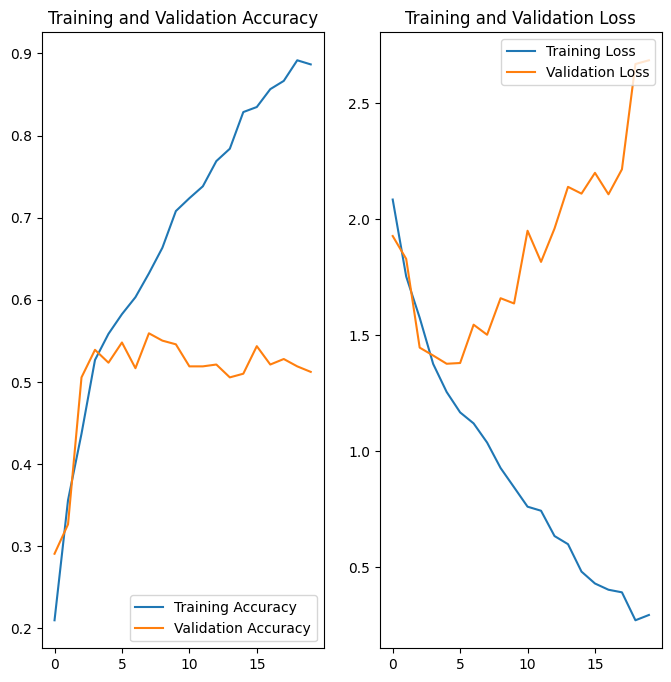

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings from above graph:
Model is Overfitting due to the below reasons:

Training accuracy is high, but validation accuracy is much lower: This indicates that the model is performing well on the training data but not generalizing well to unseen data (validation set).

Training loss continues to decrease while validation loss increases: This is a strong sign of overfitting, where the model is memorizing the training data instead of learning general patterns.

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

### Todo:
### Create the model, compile and train the model


In [ ]:
# Create Model with Augmentation Strategy

from tensorflow.keras import layers, models
import tensorflow as tf

data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),   # Horizontal flip augmentation
    layers.RandomRotation(0.1),                                                # Rotate randomly by 10%
    layers.RandomZoom(0.1),                                                    # Zoom randomly by 10%
    layers.RandomTranslation(1, 0.5, fill_mode="reflect",                      # Translate images
                             interpolation="bilinear", seed=None,
                             fill_value=0.0),
    layers.RandomCrop(img_height, img_width),                                  # Random Cropping
  ]
)


# Apply data augmentation to training data
# train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))


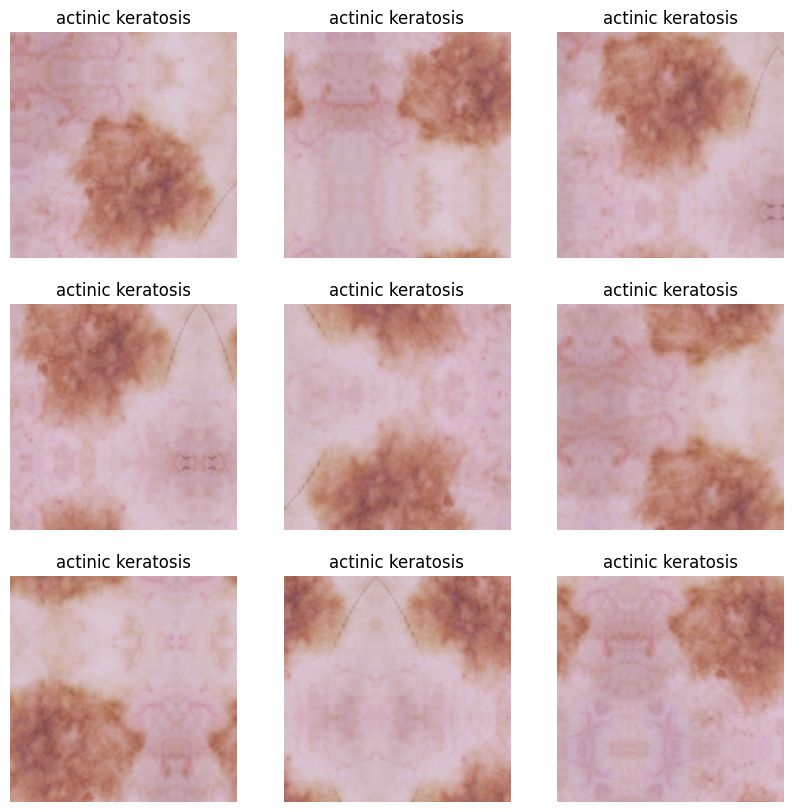

In [ ]:

# Preview augmented images (to visualize the augmentations)
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(len(class_names)):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")
    plt.title(class_names[0])


### Compiling the model

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
])

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(9)
])

In [ ]:
# Print the model summary

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.1912 - loss: 2.3387 - val_accuracy: 0.2506 - val_loss: 1.9546
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.3070 - loss: 1.8797 - val_accuracy: 0.3758 - val_loss: 1.7143
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.3998 - loss: 1.6789 - val_accuracy: 0.3893 - val_loss: 1.6830
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.3862 - loss: 1.6480 - val_accuracy: 0.4094 - val_loss: 1.6663
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.4501 - loss: 1.5642 - val_accuracy: 0.4810 - val_loss: 1.4774
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.4839 - loss: 1.4177 - val_accuracy: 0.4497 - val_loss: 1.5041
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.4699 - loss: 1.4974 - val_accuracy: 0.5078 - val_loss: 1.4410
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.4820 - loss: 1.4727 - val_accuracy: 0.5168 - v

### Visualizing the results

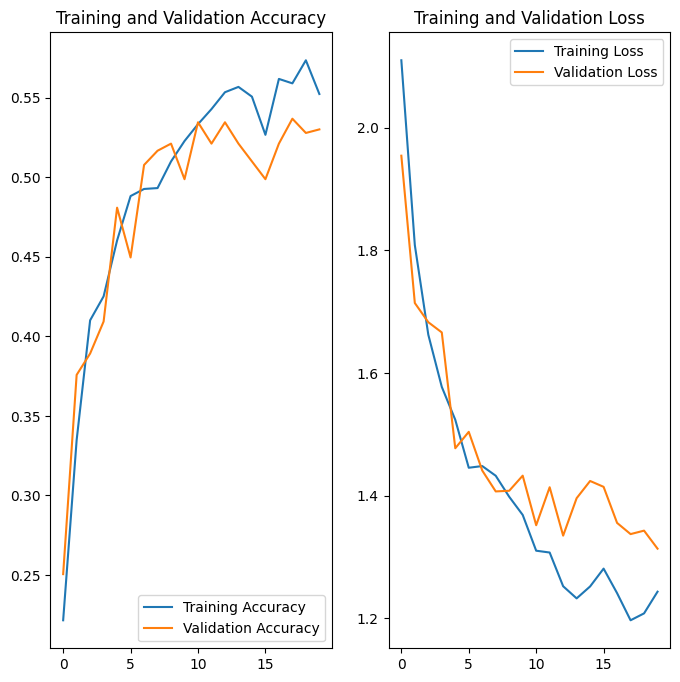

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Inference: Form the above model graph the train and test accuracy are closely moving up but the overall accuracy is 50% which is underfiting the model.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Show the distribution of classes
def class_distribution_count(directory):

    #count number of image in each classes
    count= []  # Initialize the list
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    # name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class Name', 'No. of Images'])

df = class_distribution_count(data_dir_train)
df = df.sort_values(by='No. of Images', ascending=False)
df

,Class Name,No. of Images
7,pigmented benign keratosis,462
1,melanoma,438
3,basal cell carcinoma,376
4,nevus,357
5,squamous cell carcinoma,181
8,vascular lesion,139
0,actinic keratosis,114
6,dermatofibroma,95
2,seborrheic keratosis,77


#### **Todo:** Write your findings here:
#### - 'seborrheic keratosis' class has the least number of samples.
#### - 'pigmented benign keratosis' class dominates with the highest propotionate of samples.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
import Augmentor
path_to_training_dataset=data_dir_train
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset / i))  # Convert PosixPath to string
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)  # We are adding 500 samples per class to make sure that none of the classes are sparse.


Initialised with 114 image(s) found.
Output directory set to /content/drive/My Drive/dataset/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CC18B1B2620>: 100%|██████████| 500/500 [00:24<00:00, 20.29 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/My Drive/dataset/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CC1E01319C0>: 100%|██████████| 500/500 [00:24<00:00, 20.10 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/My Drive/dataset/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CC1A217F2B0>: 100%|██████████| 500/500 [00:19<00:00, 25.52 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/My Drive/dataset/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7CC18B02AF80>: 100%|██████████| 500/500 [01:28<00:00,  5.65 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/My Drive/dataset/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CC18B049B40>: 100%|██████████| 500/500 [01:14<00:00,  6.69 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/My Drive/dataset/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CC1E0212590>: 100%|██████████| 500/500 [00:19<00:00, 25.32 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/My Drive/dataset/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7CC1E051D570>: 100%|██████████| 500/500 [00:41<00:00, 12.08 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/My Drive/dataset/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CC1E067A860>: 100%|██████████| 500/500 [00:20<00:00, 23.96 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/My Drive/dataset/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CC1E01319C0>: 100%|██████████| 500/500 [00:18<00:00, 26.37 Samples/s]


In [ ]:
# Check the files count in Train data set after augmentation:

# Defining the paths for the train and test datasets
data_dir_train = pathlib.Path("/content/drive/My Drive/dataset/Train/")
data_dir_test  = pathlib.Path("/content/drive/My Drive/dataset/Test/")


# Count the number of images in the Train dataset
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(f"Number of images in Train dataset: {image_count_train}")

Number of images in Train dataset: 2239


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
import glob
import os

# Get a list of all image file paths
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*', 'output/', '*.jpg'))]
path_list

['/content/drive/My Drive/dataset/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030036.jpg_984d7449-44f6-4686-a3c2-fe5ce5904654.jpg',
 '/content/drive/My Drive/dataset/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029930.jpg_d6119c42-42b4-48bf-82e1-493401926037.jpg',
 '/content/drive/My Drive/dataset/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026650.jpg_1392dce2-ac97-4803-8ad2-0685c29b2ecf.jpg',
 '/content/drive/My Drive/dataset/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029500.jpg_b2cf4252-5472-4832-b2dd-35036c035911.jpg',
 '/content/drive/My Drive/dataset/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026848.jpg_ba339138-f32f-4668-b6c2-73144da1f8c5.jpg',
 '/content/drive/My Drive/dataset/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031993.jpg_45199a4c-fa72-45df-9bd4-b7da8da1ce56.jpg',
 '/content/drive/My Drive/dataset/Train/actinic keratosis/output/actinic keratosis_origi

In [ ]:
import glob
import os

# Get a list of directory names for the images in the output folder
#lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*', 'output/', '*.jpg'))]
#lesion_list_new

import os
import glob

# Convert Path object to string for use with glob.glob
data_dir_train_str = str(data_dir_train)

# Use glob.glob to find all images in the 'output' directories
lesion_list_new = [
    os.path.basename(os.path.dirname(os.path.dirname(y)))
    for y in glob.glob(os.path.join(data_dir_train_str, '*', 'output', '*.jpg'))
]

# Get unique lesion categories
unique_lesion_list = list(set(lesion_list_new))

# Print the unique list (optional: display first 5 to verify)
unique_lesion_list



['seborrheic keratosis',
 'dermatofibroma',
 'melanoma',
 'basal cell carcinoma',
 'vascular lesion',
 'nevus',
 'pigmented benign keratosis',
 'actinic keratosis',
 'squamous cell carcinoma']

In [ ]:
import glob
import os

# Define the path list (getting all jpg files in the output folder)
path_list_new = [y for y in glob.glob(os.path.join(data_dir_train, '*', 'output/', '*.jpg'))]

# Get the directory names for the images
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in path_list_new]

# Create a dictionary from the path list and the lesion list
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

# Print first 5 items to validate
for path, lesion in list(dataframe_dict_new.items())[:5]:
    print(f"Path: {path}, Lesion: {lesion}")

Path: /content/drive/My Drive/dataset/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030036.jpg_984d7449-44f6-4686-a3c2-fe5ce5904654.jpg, Lesion: actinic keratosis
Path: /content/drive/My Drive/dataset/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029930.jpg_d6119c42-42b4-48bf-82e1-493401926037.jpg, Lesion: actinic keratosis
Path: /content/drive/My Drive/dataset/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026650.jpg_1392dce2-ac97-4803-8ad2-0685c29b2ecf.jpg, Lesion: actinic keratosis
Path: /content/drive/My Drive/dataset/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029500.jpg_b2cf4252-5472-4832-b2dd-35036c035911.jpg, Lesion: actinic keratosis
Path: /content/drive/My Drive/dataset/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026848.jpg_ba339138-f32f-4668-b6c2-73144da1f8c5.jpg, Lesion: actinic keratosis


In [ ]:
# Initialize original_df first if it doesn't exist
#original_df = pd.DataFrame(columns=['Path', 'Label'])

import pandas as pd  # Ensure Pandas is imported

# Create df2
df2 = pd.DataFrame(list(dataframe_dict_new.items()), columns=['Path', 'Label'])

# Use pd.concat() instead of append()
new_df = pd.concat([df, df2], ignore_index=True)

# Display new dataframe

new_df['Label'].value_counts()


,count
Label,
actinic keratosis,500
melanoma,500
seborrheic keratosis,500
basal cell carcinoma,500
nevus,500
squamous cell carcinoma,500
dermatofibroma,500
pigmented benign keratosis,500
vascular lesion,500


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
#data_dir_train="path to directory with training data + data created using augmentor"

from pathlib import Path

# Defining the paths for the train and test datasets
data_dir_train = pathlib.Path("/content/drive/My Drive/dataset/Train/")
data_dir_test  = pathlib.Path("/content/drive/My Drive/dataset/Test/")


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset='training' ,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
# Load the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,  # Directory containing training images
    image_size=(img_height, img_width),     # Resize images
    batch_size=batch_size,                  # Set batch size
    seed=seed,                              # Use seed for reproducibility
    label_mode='int',                       # Labels as integers
    validation_split=validation_split,      # Split ratio
    subset='validation'                     # Load the validation subset
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the normalization layer
normalization_layer = layers.Rescaling(1./255)

# Define the CNN Model
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        # Input Layer
        layers.InputLayer(input_shape=input_shape),
        layers.Rescaling(1./255, input_shape=input_shape),

        # Convolutional Layer 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Convolutional Layer 2
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Convolutional Layer 3
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Flatten the output
        layers.Flatten(),

        # Dense Layer
        layers.Dense(128, activation='relu'),

        # Output Layer
        layers.Dense(num_classes, activation='softmax')
    ])

    return model


#### **Todo:**  Train your model

In [ ]:
# Define input shape and number of classes
input_shape = (img_height, img_width, 3)
num_classes = 9

# Create the model
model = create_cnn_model(input_shape, num_classes)

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' for integer labels
    metrics=['accuracy']
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
# Now you can train the model
epochs = 50
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 912s 5s/step - accuracy: 0.1900 - loss: 2.1412 - val_accuracy: 0.4514 - val_loss: 1.4610
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 539s 3s/step - accuracy: 0.4348 - loss: 1.5044 - val_accuracy: 0.4677 - val_loss: 1.3718
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 562s 3s/step - accuracy: 0.5099 - loss: 1.3002 - val_accuracy: 0.5419 - val_loss: 1.1983
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 561s 3s/step - accuracy: 0.5795 - loss: 1.1208 - val_accuracy: 0.5479 - val_loss: 1.2494
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 519s 3s/step - accuracy: 0.6287 - loss: 1.0296 - val_accuracy: 0.6110 - val_loss: 1.1093
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 524s 3s/step - accuracy: 0.6822 - loss: 0.8770 - val_accuracy: 0.6325 - val_loss: 1.0715
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 564s 3s/step - accuracy: 0.7437 - loss: 0.7298 - val_accuracy: 0.7275 - val_loss: 0.8309
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 514s 3s/step - accuracy: 0.8033 - loss: 0.5716 - val_accu

#### **Todo:**  Visualize the model results

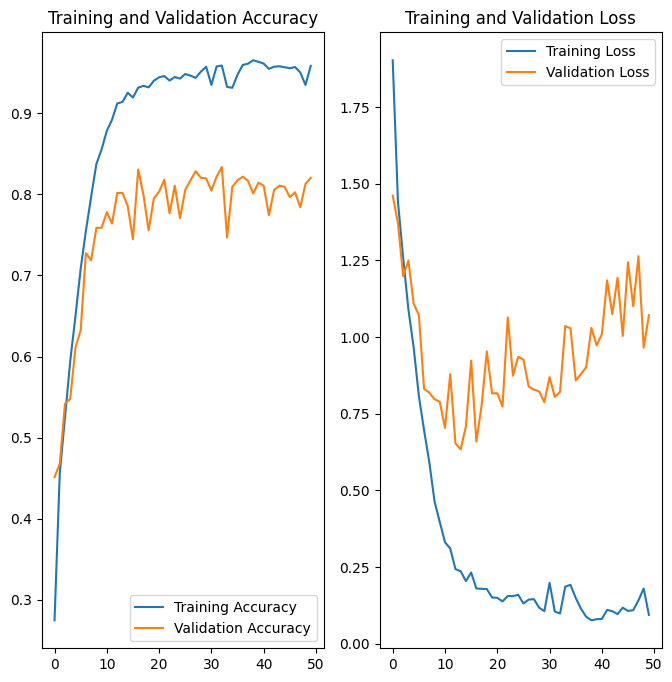

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

## Inference:

From the above model the rebalance using the Augementor Module balances the each classes by addig the more sample images 500 for each classes. we can see the accuracy is 95% and 82% acuracy for train and validation set respectively. And loss function also reduced from 2.684 to 1.07
Based on this results the model is little bit over fitting with the loss function.

## Accuracy & Loss Analytics for different Model :
#### Simple Sequential model:
accuracy: 0.9074 - loss: 0.2540 - val_accuracy: 0.5123 - val_loss: 2.6854

#### Drop Outs and Data Augumentation:
accuracy: 0.5539 - loss: 1.2543 - val_accuracy: 0.5302 - val_loss: 1.3136

#### Class Imbalance with Augumentor:
Epoch 50/50 - accuracy: 0.9532 - loss: 0.1100 - val_accuracy: 0.8203 - val_loss: 1.0711

## Model Prediction:

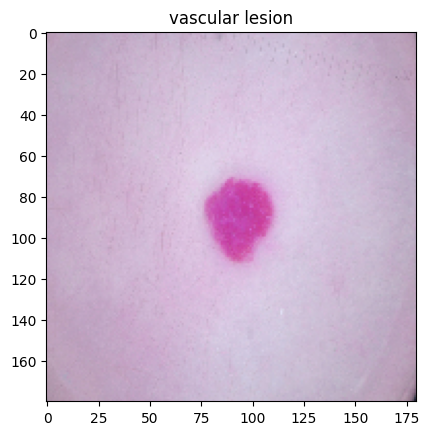

In [34]:



from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import os
import glob

# Specify the path to the test image (grab the last image from the last class in your test directory)
Test_image_path = os.path.join(data_dir_test, class_names[-1], '*.jpg')
Test_image_list = glob.glob(Test_image_path)

# Load the last image from the glob result
Test_image = load_img(Test_image_list[-1], target_size=(180, 180))

# Display the image
plt.imshow(Test_image)
plt.title(class_names[-1])
plt.grid(False)
plt.show()


Above model